In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
labels = pd.read_csv('../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [58]:
values = pd.read_csv('../csv/train_values.csv')
values.head(10).T

,0,1,2,3,4,5,6,7,8,9
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500
geo_level_1_id,6,8,21,22,11,8,9,20,0,26
geo_level_2_id,487,900,363,418,131,558,475,323,757,886
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1
age,30,10,10,10,30,10,25,0,15,0
area_percentage,6,8,5,6,8,9,3,8,8,13
height_percentage,5,7,5,5,9,5,4,6,6,4
land_surface_condition,t,o,t,t,t,t,n,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i


In [59]:
values_supers = values.iloc[:, 15:26]

Text(0, 0.5, 'Cantidad de construcciones danadas.')

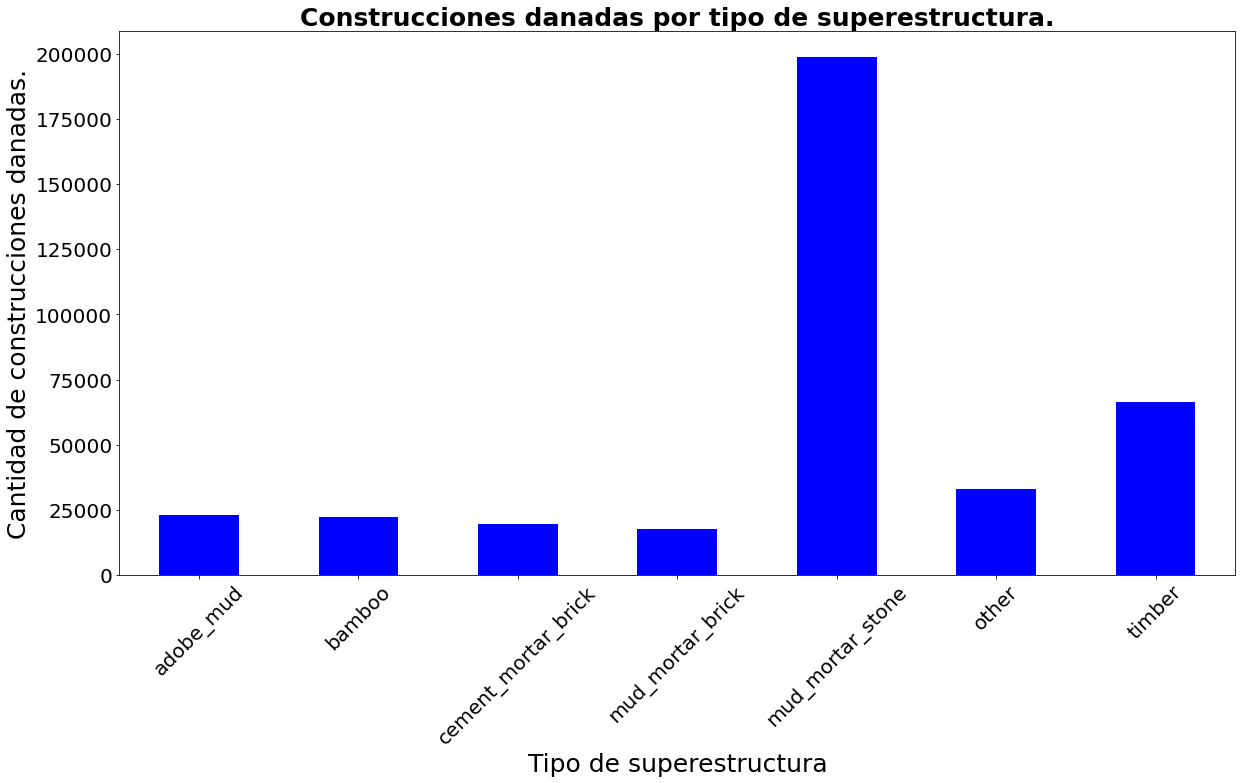

In [60]:
supers_sum = values_supers.sum()
supers_sum.index = [ind[19:] for ind in supers_sum.index]
supers_sum.index = [
    ('other' if ind in ['stone_flag', 'cement_mortar_stone', 'rc_engineered', 'rc_non_engineered' ,'other'] else ind) for ind in supers_sum.index]
supers_sum = supers_sum.to_frame().reset_index().iloc[:11].groupby('index')[0].sum()

supers_sum.plot(\
    kind="bar",\
    figsize=(20,10),\
    title = "Construcciones danadas por tipo de superestructura.",\
    xlabel = "Tipo de superestructura",\
    ylabel = "Cantidad de construcciones danadas.",\
    color = "blue",\
    rot = 45,\
    fontsize = 20)
plt.title("Construcciones danadas por tipo de superestructura.",\
          fontsize =25, fontweight = 'bold')
plt.xlabel("Tipo de superestructura", fontsize=25)
plt.ylabel("Cantidad de construcciones danadas.", fontsize=25)

In [61]:
values = values.iloc[:, 1]
values_supers["building_id"] = values
values = values_supers
merge_df = values.merge(labels, left_on = "building_id", right_on = "building_id")

In [62]:
merge_df.rename(columns= {'damage_grade': 'Grado de destruccion'}, inplace=True)
supers_damage_df = merge_df.groupby('Grado de destruccion').sum().T.iloc[:11]
supers_damage_df

Grado de destruccion,1,2,3
has_superstructure_adobe_mud,251,753,952
has_superstructure_mud_mortar_stone,5028,38684,20619
has_superstructure_stone_flag,393,2070,504
has_superstructure_cement_mortar_stone,257,537,269
has_superstructure_mud_mortar_brick,220,250,358
has_superstructure_cement_mortar_brick,197,824,571
has_superstructure_timber,2225,7451,4269
has_superstructure_bamboo,546,2673,1888
has_superstructure_rc_non_engineered,426,1118,773
has_superstructure_rc_engineered,102,205,257


Text(0, 0.5, 'Distribucion de grado de destruccion.')

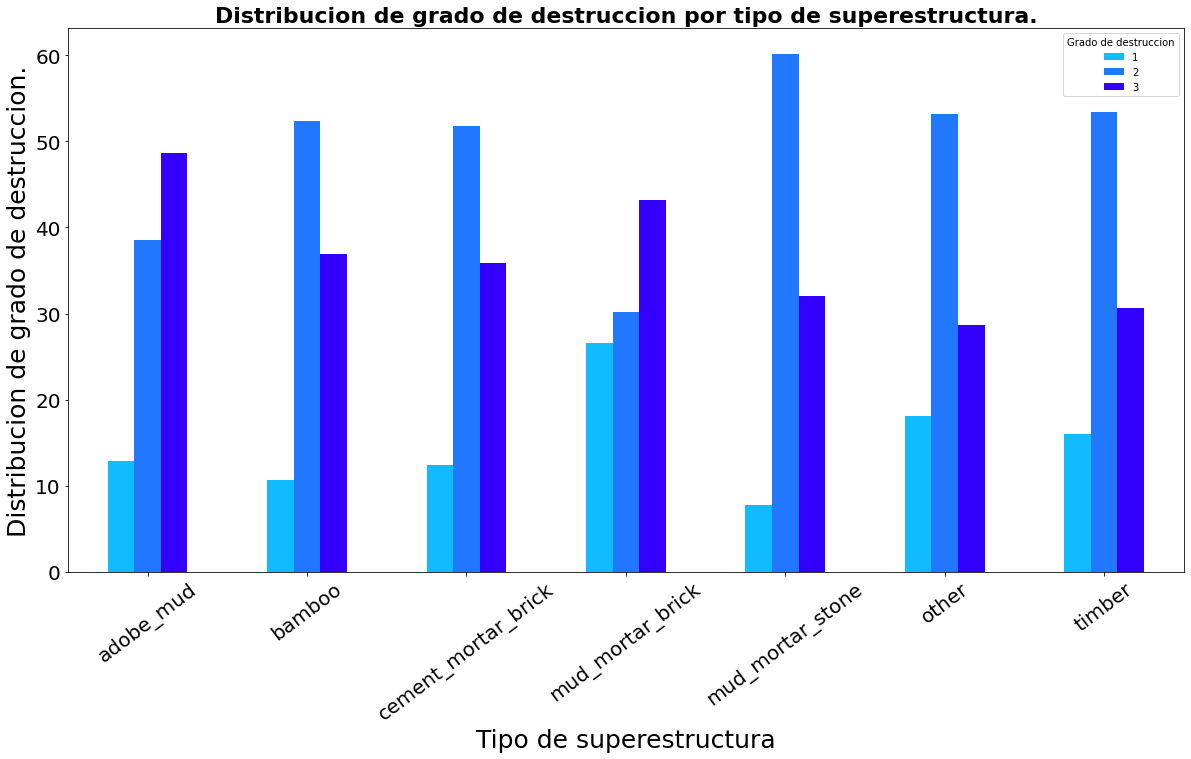

In [63]:
supers_damage_df.index = [
    ('has_superstructure_other' if ind in ['has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered' ,'has_superstructure_other'] else ind) for ind in supers_damage_df.index]
supers_damage_df = supers_damage_df.reset_index().iloc[:11].groupby('index').sum()

supers_list = supers_damage_df.index.to_list()
for s in supers_list:
    values = []
    for i in [1, 2, 3]:
        values.append(supers_damage_df.loc[s, i] / (supers_damage_df.loc[s, 1] + supers_damage_df.loc[s, 2] + supers_damage_df.loc[s, 3]) * 100) 
    supers_damage_df.loc[s] = values
supers_damage_df.index = [ind[19:] for ind in supers_damage_df.index]

supers_damage_df.plot(kind="bar",\
     figsize= (20, 10),\
     title = "Distribucion de grado de destruccion por tipo de superestructura.",\
     xlabel = "Tipo de superestructura",\
     ylabel = "Porcentaje de grado de destruccion sobre destruccion total.",\
     color = ["#11bbff", "#2277ff", "#3300ff"],\
     rot=37,\
     fontsize=20)
plt.title("Distribucion de grado de destruccion por tipo de superestructura.",\
          fontsize =22, fontweight = 'bold')
plt.xlabel("Tipo de superestructura", fontsize=25)
plt.ylabel("Distribucion de grado de destruccion.", fontsize=25)